In [1]:
import numpy as np
import importlib
import tensor_dist_viz
from tensor_dist_viz.tensor import Tensor
from tensor_dist_viz.util import multi2linearIndex
from tensor_dist_viz.viz import plotProcessorView2D, plot2DMesh, plotTensor2D

importlib.reload(tensor_dist_viz)


<module 'tensor_dist_viz' from '/home/juanpedroghm/code/tensor_dist_viz/tensor_dist_viz/__init__.py'>

In [2]:
t = Tensor( (3, 6) )
t.info()
print(t.linearIndex((0,4)))

Order: 2
Shape: [3 6]
Size: 18
[1 0]
4


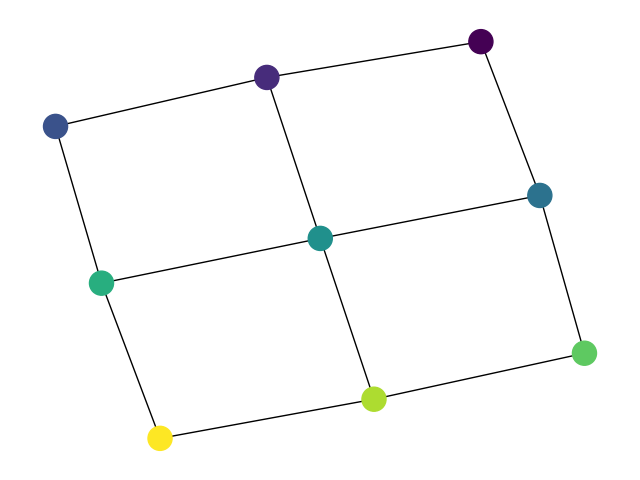

In [3]:
%matplotlib widget
mesh = Tensor((2, 3))
plot2DMesh(mesh)

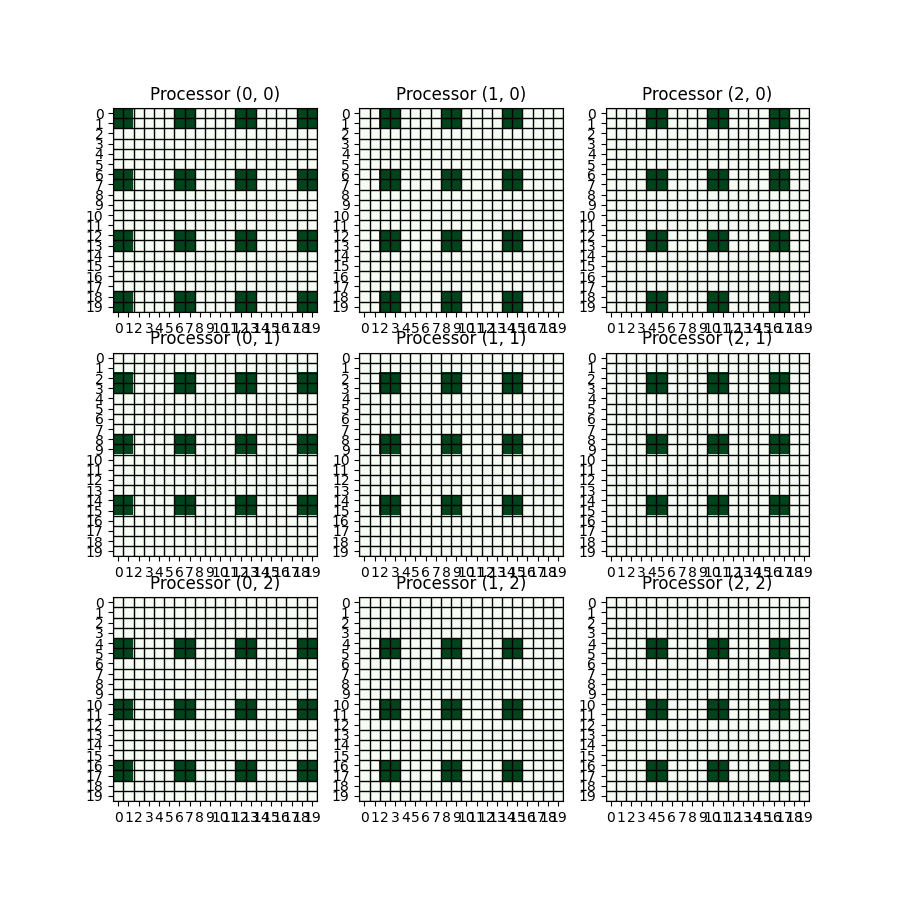

In [4]:
%matplotlib widget
from tensor_dist_viz.dist import Distributition

tensor = Tensor((20,20))
d = Distributition(mesh,  ((1,),(0,)), (2,2))
plotProcessorView2D(tensor, d)

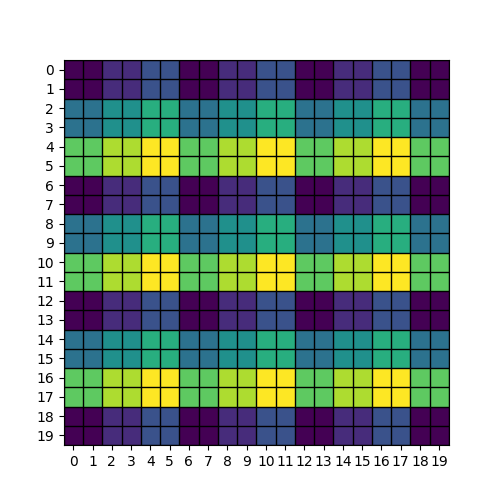

In [12]:
%matplotlib widget
from tensor_dist_viz.dist import Distributition

tensor = Tensor((20,20))
d = Distributition(mesh,  ((0,),(1,)), (2,2))
plotTensor2D(tensor, d)

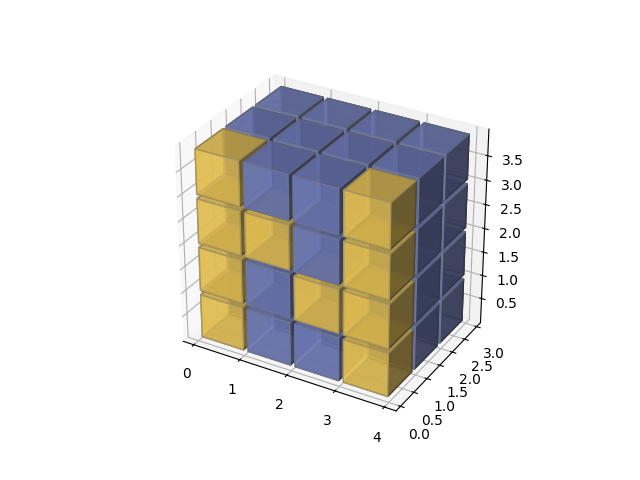

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()

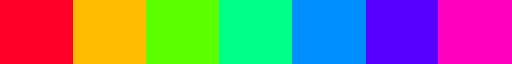

In [7]:
import matplotlib as mpl
mpl.colormaps["gist_rainbow"].resampled(7)

In [8]:
np.unravel_index(7, (3, 6, 4, 7), order='C')

(0, 0, 1, 0)

In [9]:
axis_size = 100
block_size = 5
nP = 8
print(block_size * nP)
block_size * nP > axis_size
np.ceil(axis_size / nP)



40


13.0